In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, Y=mnist.data[:1000], mnist.target[:1000]

In [4]:
data=X.copy()
data['y']=Y
data.to_csv('mnist.csv')

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Y

0      5
1      0
2      4
3      1
4      9
      ..
995    7
996    6
997    0
998    3
999    6
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
Y.value_counts()

class
7    117
1    116
4    105
9    100
2     99
0     97
6     94
3     93
5     92
8     87
Name: count, dtype: int64

In [9]:
x=np.array(X)
y=np.array(Y)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 784), (300, 784), (700,), (300,))

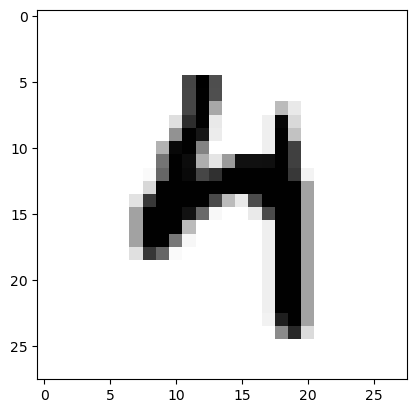

In [12]:
i=0
xi_image=x_train[i].reshape(28,28)
plt.imshow(xi_image, cmap='binary')
plt.show()

In [13]:
y_train[i]

'4'

In [14]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_prep=std.fit_transform(x_train)

In [15]:
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(loss='log_loss', random_state=1)
sgd_scores=cross_val_score(sgd_clf, x_train_prep, y_train, scoring='accuracy', cv=10)
sgd_scores

array([0.78571429, 0.8       , 0.78571429, 0.88571429, 0.81428571,
       0.87142857, 0.85714286, 0.9       , 0.95714286, 0.84285714])

In [20]:
sgd_scores.mean(), sgd_scores.std()

(0.85, 0.052779866291174767)

In [21]:
from sklearn.svm import SVC
svc_clf=SVC(random_state=1)
svc_scores=cross_val_score(svc_clf, x_train_prep, y_train, scoring='accuracy',cv=10)
svc_scores

array([0.8       , 0.8       , 0.81428571, 0.9       , 0.82857143,
       0.84285714, 0.88571429, 0.9       , 0.91428571, 0.87142857])

In [22]:
svc_scores.mean(), svc_scores.std()

(0.8557142857142859, 0.04162514938380989)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=1)
rf_scores=cross_val_score(rf_clf, x_train, y_train, scoring='accuracy',cv=10)
rf_scores

array([0.8       , 0.82857143, 0.87142857, 0.92857143, 0.85714286,
       0.88571429, 0.91428571, 0.92857143, 0.92857143, 0.85714286])

In [25]:
rf_scores.mean(), rf_scores.std()

(0.8800000000000001, 0.04295227536677973)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid=[
    {'n_estimators': [100, 300, 500], 'max_features': [4,8,12]},
    {'bootstrap': [False],'n_estimators': [300, 500], 'max_features': [8,12]}
]
rf_clf=RandomForestClassifier(random_state=1)
grid_search=GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 300}

In [35]:
rlt=grid_search.cv_results_
for mean_score, params in zip(rlt['mean_test_score'], rlt['params']):
    print(mean_score, params)

0.8728571428571428 {'max_features': 4, 'n_estimators': 100}
0.8857142857142858 {'max_features': 4, 'n_estimators': 300}
0.8800000000000001 {'max_features': 4, 'n_estimators': 500}
0.8642857142857142 {'max_features': 8, 'n_estimators': 100}
0.8885714285714286 {'max_features': 8, 'n_estimators': 300}
0.8857142857142858 {'max_features': 8, 'n_estimators': 500}
0.8857142857142858 {'max_features': 12, 'n_estimators': 100}
0.8914285714285715 {'max_features': 12, 'n_estimators': 300}
0.8842857142857143 {'max_features': 12, 'n_estimators': 500}
0.9028571428571428 {'bootstrap': False, 'max_features': 8, 'n_estimators': 300}
0.8971428571428571 {'bootstrap': False, 'max_features': 8, 'n_estimators': 500}
0.9 {'bootstrap': False, 'max_features': 12, 'n_estimators': 300}
0.8928571428571429 {'bootstrap': False, 'max_features': 12, 'n_estimators': 500}


In [36]:
best_model=grid_search.best_estimator_

In [37]:
best_model.score(x_test, y_test)

0.8866666666666667

In [38]:
from sklearn.metrics import confusion_matrix
y_test_pred=best_model.predict(x_test)
conf=confusion_matrix(y_test, y_test_pred)
conf

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 26,  0,  0,  0,  1,  1,  0,  0],
       [ 1,  0,  0, 24,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  2,  1, 22,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  0, 27,  0,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  3,  0,  1,  1,  0, 19,  1],
       [ 1,  0,  0,  1,  0,  0,  1,  3,  0, 24]], dtype=int64)

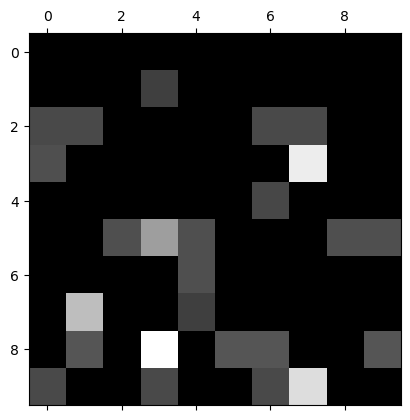

In [39]:
row_sums=conf.sum(axis=1, keepdims=True)
norm_conf=conf/row_sums
np.fill_diagonal(norm_conf, 0)
plt.matshow(norm_conf, cmap=plt.cm.gray)
plt.show()

In [40]:
imp=best_model.feature_importances_

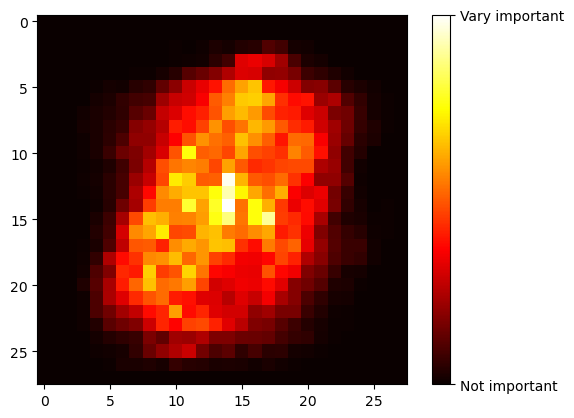

In [41]:
import matplotlib as mpl
plt.imshow(imp.reshape(28,28),cmap=mpl.cm.hot)
cbar=plt.colorbar(ticks=[imp.min(), imp.max()])
cbar.ax.set_yticklabels(['Not important', 'Vary important'])
plt.show()

In [42]:
final_model=best_model

In [43]:
import joblib
joblib.dump(final_model, 'final_model_clf.pkl')

['final_model_clf.pkl']

In [44]:
model_clf_loaded=joblib.load('final_model_clf.pkl')

In [45]:
model_clf_loaded.predict(x_test[:10])

array(['3', '4', '0', '6', '3', '7', '9', '6', '2', '3'], dtype=object)